In [1]:
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
topog = xr.open_dataset('ori_topog.nc')
kmt = xr.open_dataset('kmt.nc')
ocean = xr.open_dataset('ocean_mask.nc')
grid = xr.open_dataset('ocean_grid.nc')

In [11]:
topog

<xarray.Dataset>
Dimensions:  (nx: 360, ny: 300)
Coordinates:
  * nx       (nx) float64 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * ny       (ny) float64 1.0 2.0 3.0 4.0 5.0 ... 296.0 297.0 298.0 299.0 300.0
Data variables:
    depth    (ny, nx) float64 ...
Attributes:
    history:  24/11/2017 16:37:02 ./partial_cell_check /short/v45/amh157/acce...

In [14]:
!ncdump -h ocean_grid.nc

netcdf ocean_grid {
dimensions:
	xt_ocean = 360 ;
	yt_ocean = 300 ;
	time = UNLIMITED ; // (1 currently)
	xu_ocean = 360 ;
	yu_ocean = 300 ;
variables:
	double xt_ocean(xt_ocean) ;
		xt_ocean:long_name = "tcell longitude" ;
		xt_ocean:units = "degrees_E" ;
		xt_ocean:cartesian_axis = "X" ;
	double yt_ocean(yt_ocean) ;
		yt_ocean:long_name = "tcell latitude" ;
		yt_ocean:units = "degrees_N" ;
		yt_ocean:cartesian_axis = "Y" ;
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 0001-01-01 00:00:00" ;
		time:cartesian_axis = "T" ;
		time:calendar_type = "NOLEAP" ;
		time:calendar = "NOLEAP" ;
	double xu_ocean(xu_ocean) ;
		xu_ocean:long_name = "ucell longitude" ;
		xu_ocean:units = "degrees_E" ;
		xu_ocean:cartesian_axis = "X" ;
	double yu_ocean(yu_ocean) ;
		yu_ocean:long_name = "ucell latitude" ;
		yu_ocean:units = "degrees_N" ;
		yu_ocean:cartesian_axis = "Y" ;
	float geolon_t(yt_ocean, xt_ocean) ;
		geolon_t:long_name = "tracer longitude" ;
		geolon_t:units = "

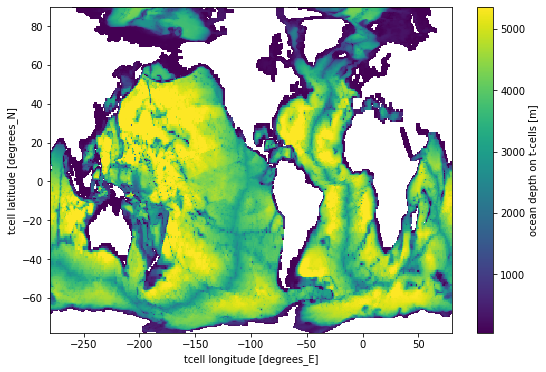

In [3]:
grid.ht.plot(size=6)

In [5]:
kmt

<xarray.Dataset>
Dimensions:  (nx: 360, ny: 300)
Dimensions without coordinates: nx, ny
Data variables:
    kmt      (ny, nx) float64 ...

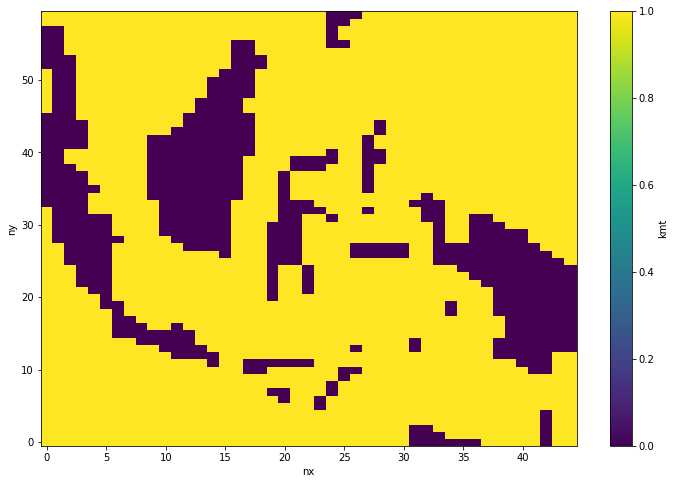

In [9]:
kmt.kmt.sel(ny=slice(100,160),nx=slice(20,65)).plot(size=8)

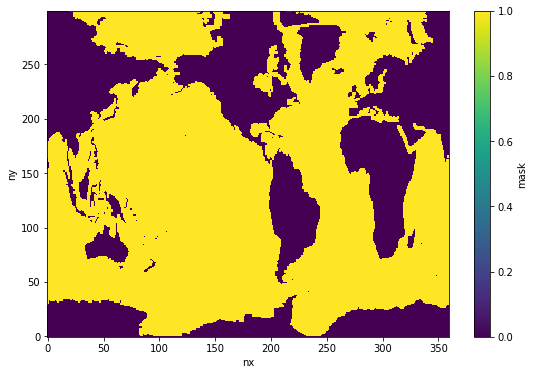

In [4]:
ocean.mask.plot(size=6)

In [5]:
# Modify topog.nc to make the Antarctic Peninsula an ISLAND! ^_^
# First, get the lon-lat coordinates from the ocean_grid
ocean = ocean.assign_coords({'geolat_t':grid.coords['geolat_t'].rename({'yt_ocean':'ny', 'xt_ocean':'nx'})})
ocean = ocean.assign_coords({'geolon_t':grid.coords['geolon_t'].rename({'yt_ocean':'ny', 'xt_ocean':'nx'})})
ocean.coords['geolat_t'].values = grid.coords['geolat_t'].values
ocean.coords['geolon_t'].values = grid.coords['geolon_t'].values

In [32]:
ocean

<xarray.Dataset>
Dimensions:   (nx: 360, ny: 300)
Coordinates:
  * nx        (nx) float64 -279.5 -278.5 -277.5 -276.5 ... 76.5 77.5 78.5 79.5
  * ny        (ny) float64 -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
    geolon_t  (ny, nx) float32 nan nan nan nan ... 79.95559 79.973366 79.99112
    geolat_t  (ny, nx) float32 nan nan nan nan ... 66.03603 65.62643 65.21044
Data variables:
    mask      (ny, nx) float64 ...

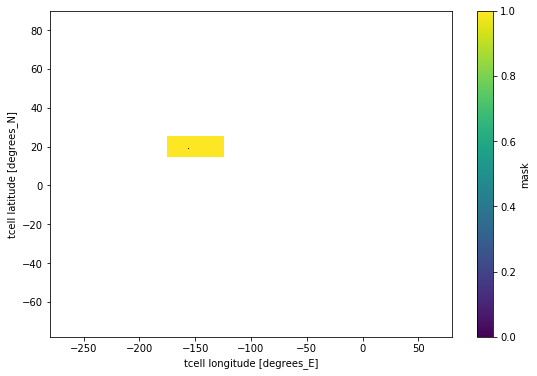

In [16]:
# Visually find Hawai'i!
ocean.where((ocean.geolon_t > -175) & (ocean.geolon_t < -125)
            & (ocean.geolat_t > 15) & (ocean.geolat_t < 25)).mask.plot(size=6)

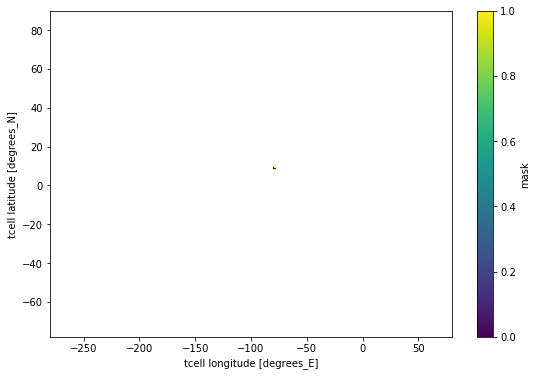

In [24]:
# Visually find Panama!
ocean.where((ocean.geolon_t > -80) & (ocean.geolon_t < -78)
            & (ocean.geolat_t > 8) & (ocean.geolat_t < 10)).mask.plot(size=6)

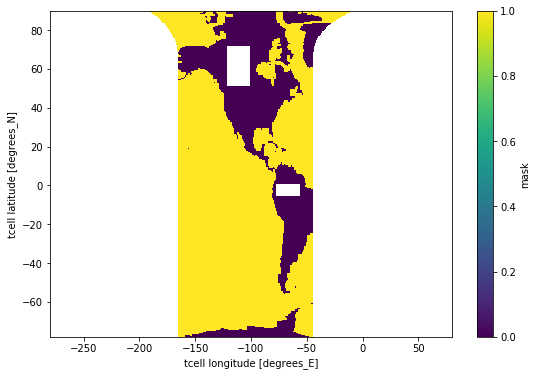

In [6]:
# Visually find where the Antarctic Peninsula is
ocean.where((ocean.geolon_t > -165) & (ocean.geolon_t < -45)
           ).mask.plot(size=6)

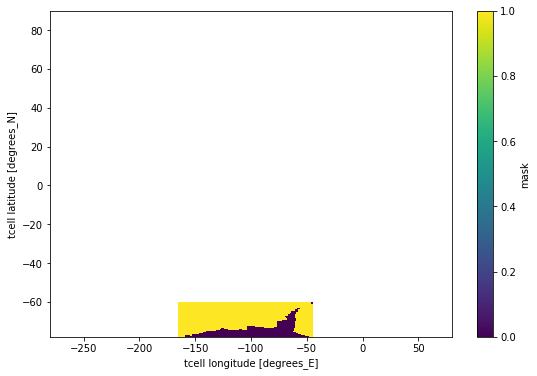

In [48]:
ocean.where((ocean.geolon_t > -165) & (ocean.geolon_t < -45)
           & (ocean.geolat_t < -60) ).mask.plot(size=6)

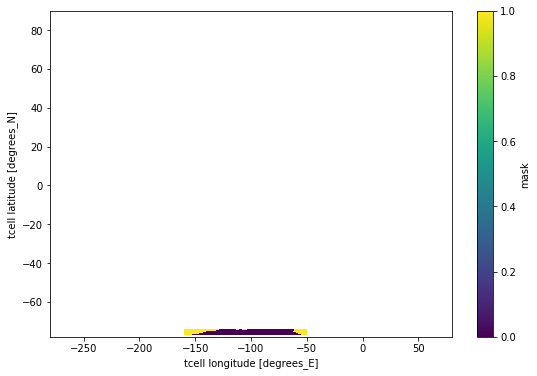

In [38]:
# We want to flood anything between -77 & -74 lat,
# to open a 333 km channel
ocean.where((ocean.geolon_t > -160) & (ocean.geolon_t < -50)
            & (ocean.geolat_t > -77) & (ocean.geolat_t < -74)).mask.plot(size=6)

In [40]:
topog = topog.assign_coords({'geolat_t':grid.coords['geolat_t'].rename({'yt_ocean':'ny', 'xt_ocean':'nx'})})
topog = topog.assign_coords({'geolon_t':grid.coords['geolon_t'].rename({'yt_ocean':'ny', 'xt_ocean':'nx'})})
topog.coords['geolat_t'].values = grid.coords['geolat_t'].values
topog.coords['geolon_t'].values = grid.coords['geolon_t'].values

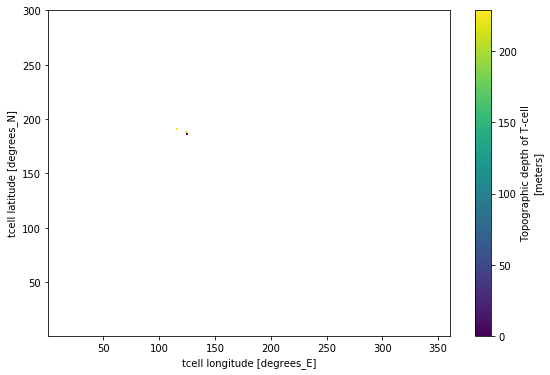

In [19]:
# HAWAI'I
topog.where((topog.geolon_t > -175) & (topog.geolon_t < -125)
           & (topog.geolat_t > 15) & (topog.geolat_t < 25)
           & (topog.depth < 300)).depth.plot(size=6)

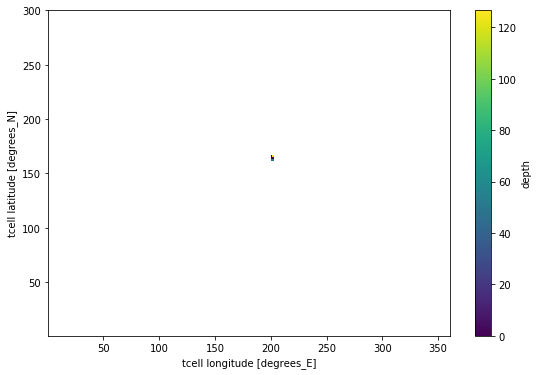

In [33]:
# PANAMA
topog.where((topog.geolon_t > -80) & (topog.geolon_t < -78)
           & (topog.geolat_t > 8) & (topog.geolat_t < 10)
           & (topog.depth < 300)).depth.plot(size=6)

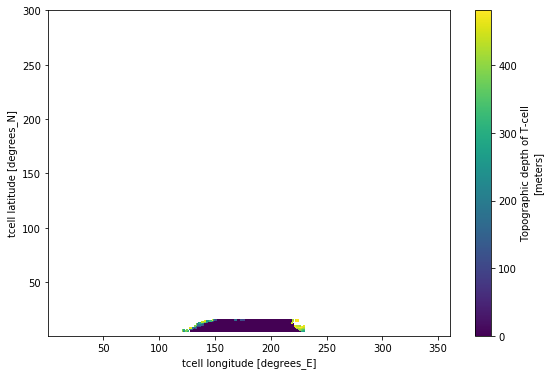

In [41]:
# ANTARCTICA
topog.where((topog.geolon_t > -160) & (topog.geolon_t < -50)
           & (topog.geolat_t > -77) & (topog.geolat_t < -74)
           & (topog.depth < 500)).depth.plot(size=6)

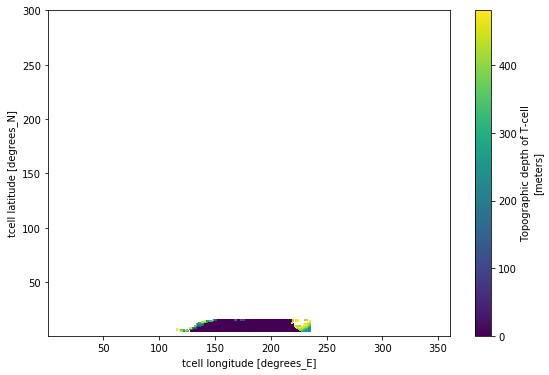

In [42]:
# Original (more realistic) flood region
topog.where((topog.geolon_t > -165) & (topog.geolon_t < -45)
           & (topog.geolat_t > -77) & (topog.geolat_t < -74)
           & (topog.depth < 500)).depth.plot(size=6)

In [21]:
# Establish the flooding region for HAWAI'I
flood = ((topog.geolon_t > -175) & (topog.geolon_t < -125)
        & (topog.geolat_t > 15) & (topog.geolat_t < 25)
        & (topog.depth < 300))

In [34]:
# Establish the flooding region for PANAMA
flood = ((topog.geolon_t > -80) & (topog.geolon_t < -78)
        & (topog.geolat_t > 8) & (topog.geolat_t < 10)
        & (topog.depth < 300))

In [43]:
# Establish the flooding region for ANTARCTICA
flood = ((topog.geolon_t > -165) & (topog.geolon_t < -45)
        & (topog.geolat_t > -77) & (topog.geolat_t < -74)
        & (topog.depth < 500))

In [44]:
# http://xarray.pydata.org/en/stable/generated/xarray.where.html
topog['depth'] = xr.where(flood, 500, topog['depth'])

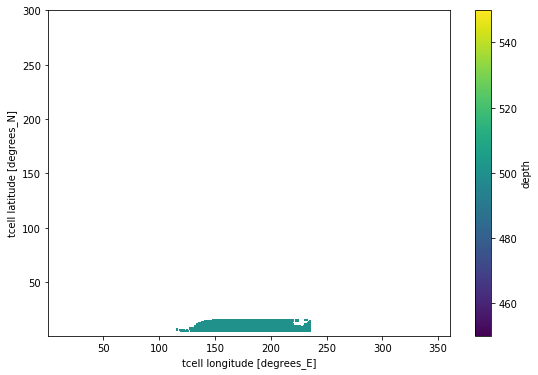

In [45]:
topog.where(flood).depth.plot(size=6)

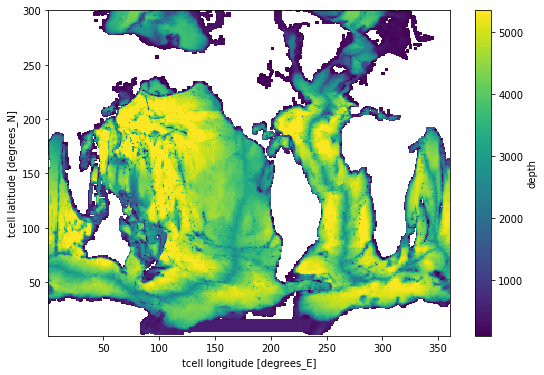

In [46]:
topog.where(topog.depth > 0).depth.plot(size=6)

In [47]:
# Destroy the lon-lat coordinates, which shouldn't be there
topog = topog.drop('geolon_t')
topog = topog.drop('geolat_t')
topog

<xarray.Dataset>
Dimensions:  (nx: 360, ny: 300)
Coordinates:
  * nx       (nx) float64 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * ny       (ny) float64 1.0 2.0 3.0 4.0 5.0 ... 296.0 297.0 298.0 299.0 300.0
Data variables:
    depth    (ny, nx) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    history:  24/11/2017 16:37:02 ./partial_cell_check /short/v45/amh157/acce...

In [50]:
# Save the new topography to file
# Apparently, you cannot save it with the same name you opened it
# because it must be stored in buffer or somewhere, so it will ignore you
# At least when you try to open the file with the same name again
topog.to_netcdf("5k_topog.nc")

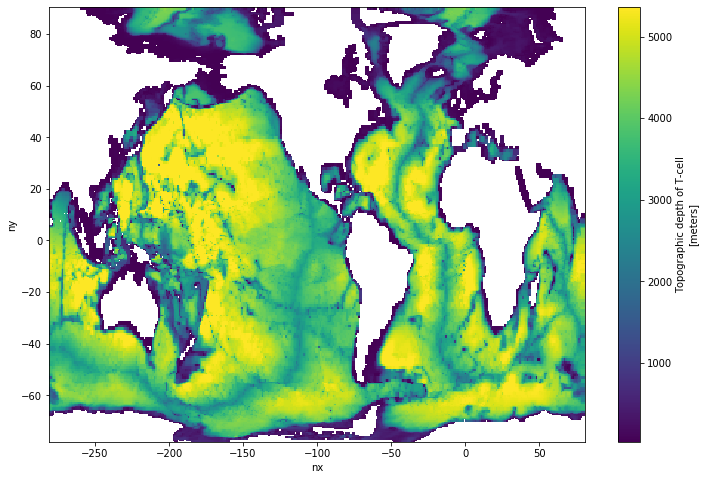

In [7]:
# Check the file
neo = xr.open_dataset('topog_gold_fix.nc')
neo.where(neo.depth>0).depth.plot(size=8)

In [3]:
# Go to the Terminal, and generate the new CICE & MOM masks with
# cd /Users/godric/Dropbox/Python/OM2/topogtools
# ./topog2mask.py 5k_topog.nc 5k_kmt.nc 5k_ocean_mask.nc
# Then, open the new files & check
kmt = xr.open_dataset('kmt_gold_fix.nc')
ocean = xr.open_dataset('ocean_mask_gold_fix.nc')

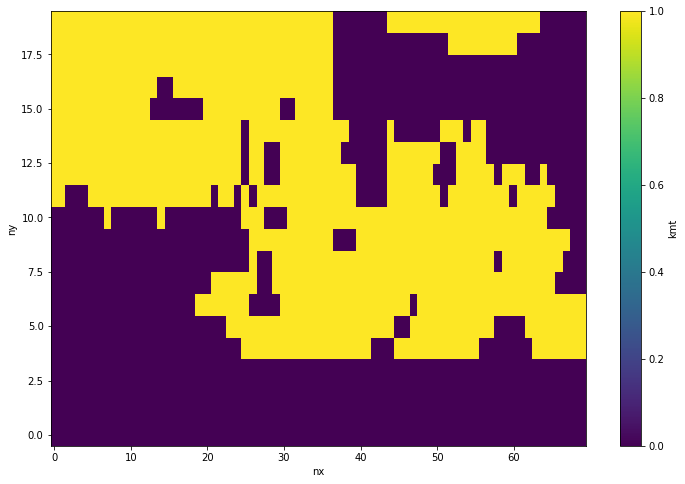

In [9]:
kmt.kmt.sel(ny=slice(0,20),nx=slice(140,210)).plot(size=8)

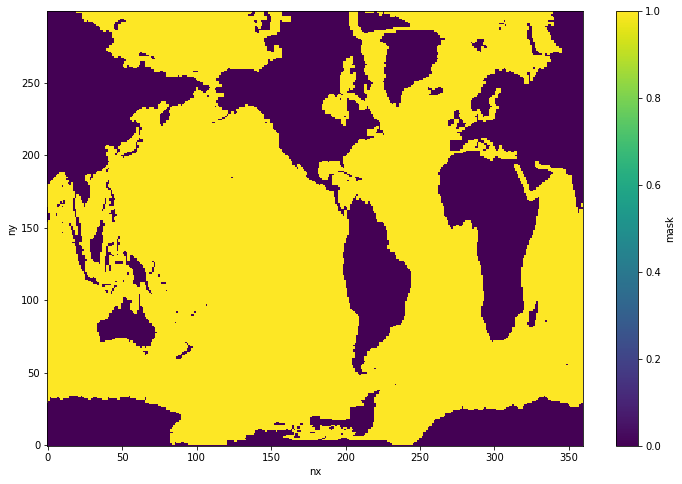

In [5]:
ocean.mask.plot(size=8)

In [5]:
# Success!